### import libraries

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets 

import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
import warnings
warnings.filterwarnings('ignore')

### Import datasets

In [47]:
dataset = datasets.load_iris()

In [42]:
X = pd.DataFrame (dataset.data )
y = pd.DataFrame (dataset.target )

In [48]:
X.head()

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [49]:
y.head()

,0
0,0
1,0
2,0
3,0
4,0


In [59]:

alldata = X
alldata[4] =y

In [64]:
alldata.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [66]:
alldata.corr() 

,0,1,2,3,4
0,1.000000,-0.117570,0.871754,0.817941,0.782561
1,-0.117570,1.000000,-0.428440,-0.366126,-0.426658
2,0.871754,-0.428440,1.000000,0.962865,0.949035
3,0.817941,-0.366126,0.962865,1.000000,0.956547
4,0.782561,-0.426658,0.949035,0.956547,1.000000


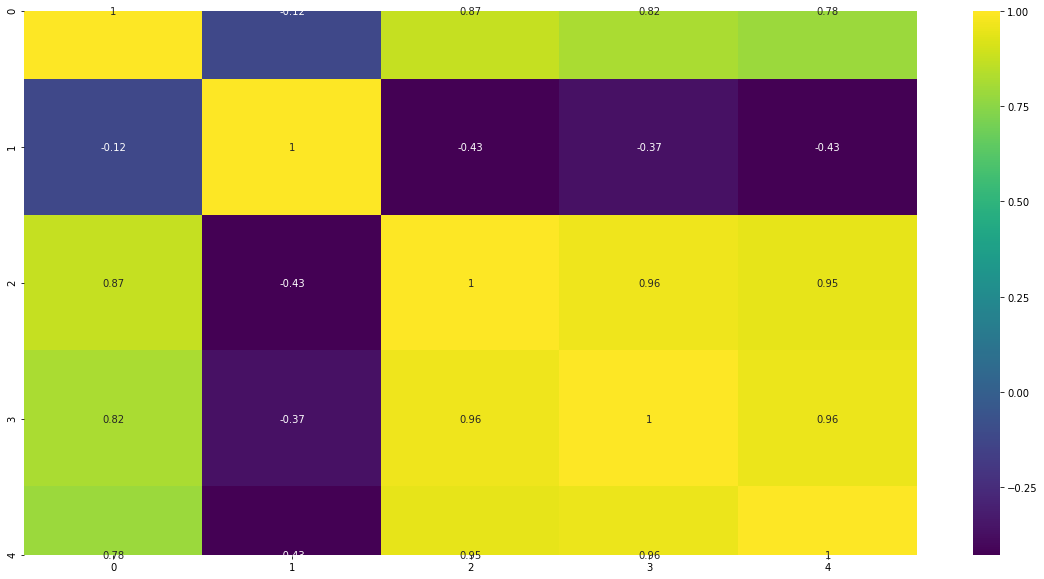

In [67]:
plt.figure(figsize=(20,10))
sns.heatmap(alldata.corr(),annot=True,cmap='viridis')


In [68]:
alldata.isnull().sum()

0    0
1    0
2    0
3    0
4    0
dtype: int64

In [72]:
X = alldata.iloc[:, :-1]
y = alldata.iloc[:, -1]

### Split into train and test

In [7]:
""" from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
"""

### Feature Scaling 

In [74]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
X = sc.transform(X)

### Training and evaluation

In [75]:
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC

In [78]:
# List of models to compare 
seed = 7
models = []
models.append(('LR', LogisticRegression(random_state=0)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', MultinomialNB()))
models.append(('SVM', LinearSVC()))
models.append(('RANFOR',RandomForestRegressor(n_estimators=200, max_depth=3, random_state=0)))


In [79]:
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, X, y, cv=kfold)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

LR: 0.880000 (0.148474)
KNN: 0.933333 (0.084327)
CART: 0.940000 (0.069602)
NB: 0.393333 (0.438634)
SVM: 0.926667 (0.100885)
RANFOR: 0.496378 (0.496476)


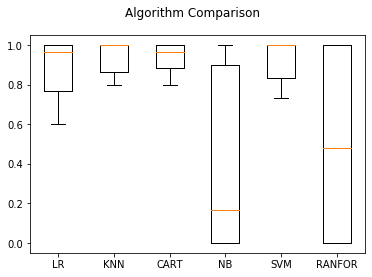

In [80]:
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()